# TCSS 588 Ensemble Project Winter  2019

#### This notebook contains the code to calculate the accuracy of a decision tree and extra tree classifier trained, and then using the coefficients of the trained classifier to deterine the relevant genes. 
#### To summarize, here are the steps this  notebook takes:
####  Step 1. Load the data for 100 genes.
#### Step 2. Remove the entry_id column from this data
#### Step 3. Train a Decision Tree Classifier using this data using 5 fold cross validation
#### Step 5: Train an Extra Trees Classifier using this data using 5 fold cross validation
#### Step 4: Determine the genes that are important using the Extra Trees Classifier
#### Step 6: Determine the genes that are important using the Decision Classifier

### Dependencies
### Data Files

#### 1. The file  data\\aml.data.RNA.100.csv - this has the  data
#### 2. The file data\\aml.data.labels.csv  - this file  has the Y values - the class we would like to predict

### Packages

#### This code depends on the following python packages:
#####  os, sklearn, pandas, 


## Step 1. Load the Data

#### We load the training data and the testing data. 
####  a. First laod the RNA genes data file. 
####  Also drop the entry_id column from it since that is a primary key and not required for  training or classification purposes. The data from both the files match based on the entry_id


In [22]:
import os
os.getcwd()

'C:\\Users\\radeshpa\\Desktop\\New folder (2)'

# Step 1. First for 100 data set

In [23]:
dataSize = "100"

In [24]:
import os
import pandas as pd
inputDataFile = "data\\aml.data.RNA.100.csv"
labelDataFile = "data\\aml.data.labels.csv"
X_Original = pd.read_csv(os.path.join(os.getcwd(), inputDataFile))
# Drop the entry id column
X = X_Original.drop(X_Original.columns[0], axis=1)
X.head()
X.shape

(177, 117)

#### b. Load the output classifier data. Once again, drop the risk_entry columnn.

In [25]:
y_Original = pd.read_csv(os.path.join(os.getcwd(), labelDataFile))
# Drop the entry id
y = y_Original.drop(y_Original.columns[0], axis=1)
y.head()
y.shape

(177, 1)

# Step 2. Generate Training and Test Sets

#### a.  Create an instance of KFold to split the data into 5 folds.

In [26]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier


splitCount = 5

# Setting the random state ensures identical results.

kFolds = KFold(n_splits = splitCount, shuffle=False, random_state=3)


#### b. Now perform 5-fold cross validation for  decision tree model.

In [27]:
allTreeAccuracyValues = []
allTreeFeatureImportanceValues = []
allTreeModels = []

for train_index, test_index in kFolds.split(X):
    X_train, X_test = X.ix[train_index], X.ix[test_index]
    y_train, y_test = y.ix[train_index], y.ix[test_index]
    tree = DecisionTreeClassifier()
    treeResult = tree.fit(X_train, y_train)
    y_prediction = treeResult.predict(X_test)
    y_actual = y_test['risk'].values
    accuracy = (y_prediction == y_actual).sum()/len(y_actual)
    allTreeAccuracyValues.append(accuracy * 100)
    allTreeFeatureImportanceValues.append(treeResult.feature_importances_)
    allTreeModels.append(treeResult)

allTreeAccuracyValues

c:\users\radeshpa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
c:\users\radeshpa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
c:\users\radeshpa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
c:\

[88.88888888888889,
 83.33333333333334,
 91.42857142857143,
 91.42857142857143,
 94.28571428571428]

In [28]:
treeAccuracyValuesFrame = pd.DataFrame(allTreeAccuracyValues, columns=['Accuracy'])
treeAccuracyValuesFrame
treeAccuracyValuesFrame.to_csv("data\\{}_tree_accuracyValues.csv".format(dataSize))

#### c. Perform 5-fold cross validation using the ExtraTreesClassifier model.

In [29]:
from sklearn.ensemble import ExtraTreesClassifier


allExtraTreeAccuracyValues = []
allExtraTreeFeatureImportanceValues = []
allExtraTreeModels = []


for train_index, test_index in kFolds.split(X):
    X_train, X_test = X.ix[train_index], X.ix[test_index]
    y_train, y_test = y.ix[train_index], y.ix[test_index]
    num_trees = 10
    extraTree = ExtraTreesClassifier(n_estimators=num_trees)
    extraTreeResult = extraTree.fit(X_train, y_train)
    y_prediction = extraTreeResult.predict(X_test)
    y_actual = y_test['risk'].values
    accuracy = (y_prediction == y_actual).sum()/len(y_actual)
    
    allExtraTreeAccuracyValues.append(accuracy * 100)
    allExtraTreeFeatureImportanceValues.append(extraTreeResult.feature_importances_)
    allExtraTreeModels.append(treeResult)
    
allExtraTreeAccuracyValues

c:\users\radeshpa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
c:\users\radeshpa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
c:\users\radeshpa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for e

[88.88888888888889,
 94.44444444444444,
 94.28571428571428,
 94.28571428571428,
 91.42857142857143]

In [30]:
extraTreeAccuracyValuesFrame = pd.DataFrame(allExtraTreeAccuracyValues, columns=['Accuracy'])
extraTreeAccuracyValuesFrame.to_csv("data\\{}_extratrees_accuracyValues.csv".format(dataSize))
extraTreeAccuracyValuesFrame

Accuracy
0  88.888889
1  94.444444
2  94.285714
3  94.285714
4  91.428571

# Step 3. Create a data frame to store the Feature Importance Values. 


#### a. First acquire all the column names.

In [31]:
columnNames = X.columns.get_values().tolist()

In [32]:
import pandas as pd

extraTreeGiniValuesFrame = pd.DataFrame(columns=columnNames)
extraTreeGiniValuesFrame.columns = columnNames

directory = 'data\\{}'.format(dataSize)
import os
if not os.path.exists(directory):
    os.makedirs(directory)


# Iterate over the feature importance values for every model.
for i in range(len(allExtraTreeFeatureImportanceValues)):    
    extraTreeGiniValuesFrame = extraTreeGiniValuesFrame.append(dict(zip(columnNames, allExtraTreeFeatureImportanceValues[i])), ignore_index=True)

# Write the results to a CSV File.
outputFileName = 'data\\{}\\{}_extra_tree_feature_importance_all.csv'.format(dataSize, dataSize)
extraTreeGiniValuesFrame.to_csv(outputFileName)
extraTreeGiniValuesFrame

ENSG00000002586.16  ENSG00000005381.7  ENSG00000007516.12  \
0            0.000000           0.000512            0.000000   
1            0.008743           0.014332            0.001549   
2            0.002886           0.001966            0.001763   
3            0.000828           0.000000            0.002416   
4            0.000000           0.000593            0.000000   

   ENSG00000019991.14  ENSG00000037280.14  ENSG00000065054.12  \
0            0.010270            0.004245            0.006680   
1            0.040271            0.002479            0.001401   
2            0.012038            0.006310            0.004435   
3            0.006678            0.000000            0.000322   
4            0.005700            0.005656            0.002084   

   ENSG00000067177.13  ENSG00000078399.14  ENSG00000078596.9  \
0            0.000000            0.081834           0.001435   
1            0.002066            0.004594           0.002700   
2            0.000000            0.010915           0.002211   
3            0.024629            0.004511           0.000000   
4            0.008315            0.000000           0.001924   

   ENSG00000086205.15  ...  ENSG00000260182.1  ENSG00000262877.4  \
0            0.000000  ...           0.012661           0.017407   
1            0.000000  ...           0.006639           0.027794   
2            0.001474  ...           0.018241           0.001755   
3            0.014160  ...           0.020701           0.001933   
4            0.005951  ...           0.122559           0.002165   

   ENSG00000263961.5  ENSG00000267453.5  ENSG00000270182.1  ENSG00000271447.4  \
0           0.000000           0.013576           0.024335           0.002965   
1           0.000000           0.004045           0.034222           0.044118   
2           0.001966           0.004544           0.044923           0.000000   
3           0.004892           0.008489           0.018173           0.004027   
4           0.006932           0.009164           0.046439           0.032315   

   ENSG00000275325.3  ENSG00000275342.3  ENSG00000276141.3  ENSG00000277867.1  
0           0.001913           0.000661           0.000000           0.004195  
1           0.003881           0.001311           0.003228           0.004603  
2           0.002519           0.004774           0.000614           0.000000  
3           0.001160           0.001450           0.010162           0.035148  
4           0.006012           0.000000           0.002540           0.002663  

[5 rows x 117 columns]

In [33]:
# Calculate the mean importance for all the genes for Extra Trees
extraTreeGiniValuesFrameMean = pd.DataFrame(columns = extraTreeGiniValuesFrame.columns)
extraTreeGiniValuesFrameMean.loc[0] = extraTreeGiniValuesFrame.mean()
# Sort the results based on importance values
extraTreeGiniValuesFrameMean = extraTreeGiniValuesFrameMean.sort_values(extraTreeGiniValuesFrameMean.last_valid_index(), axis=1, ascending = False)
extraTreeGiniValuesFrameMean

ENSG00000257718.1  ENSG00000260182.1  ENSG00000105997.21  \
0            0.05356            0.03616            0.035368   

   ENSG00000270182.1  ENSG00000132975.7  ENSG00000170893.3  ENSG00000129194.6  \
0           0.033618            0.03011           0.029616            0.02896   

   ENSG00000253293.4  ENSG00000147488.10  ENSG00000106006.6  ...  \
0           0.024607            0.023274            0.02196  ...   

   ENSG00000151917.16  ENSG00000087495.15  ENSG00000147257.12  \
0            0.001466             0.00141             0.00131   

   ENSG00000113140.9  ENSG00000174059.15  ENSG00000007516.12  \
0           0.001211            0.001155            0.001146   

   ENSG00000248334.5  ENSG00000198576.3  ENSG00000113389.14  \
0           0.001061           0.000986            0.000768   

   ENSG00000182168.13  
0            0.000747  

[1 rows x 117 columns]

In [34]:
# Write the results to a CSV File
extraTreeGiniValuesFrameMean.transpose().to_csv("data\\{}\\{}_extra_trees_feature_importance_average.csv".format(dataSize, dataSize))

In [35]:
import pandas as pd

decisionTreeGiniValuesFrame = pd.DataFrame(columns=columnNames)
decisionTreeGiniValuesFrame.columns = columnNames
decisionTreeGiniValuesFrame

for i in range(len(allTreeFeatureImportanceValues)):    
    decisionTreeGiniValuesFrame = decisionTreeGiniValuesFrame.append(dict(zip(columnNames, allTreeFeatureImportanceValues[i])), ignore_index=True)

# Write the results to the output frame.
decisionTreeGiniValuesFrame.to_csv('data\\{}\\{}_decisiontree_feature_importance_all.csv'.format(dataSize, dataSize))
decisionTreeGiniValuesFrame

ENSG00000002586.16  ENSG00000005381.7  ENSG00000007516.12  \
0                 0.0                0.0                 0.0   
1                 0.0                0.0                 0.0   
2                 0.0                0.0                 0.0   
3                 0.0                0.0                 0.0   
4                 0.0                0.0                 0.0   

   ENSG00000019991.14  ENSG00000037280.14  ENSG00000065054.12  \
0                 0.0            0.000000                 0.0   
1                 0.0            0.009952                 0.0   
2                 0.0            0.000000                 0.0   
3                 0.0            0.000000                 0.0   
4                 0.0            0.000000                 0.0   

   ENSG00000067177.13  ENSG00000078399.14  ENSG00000078596.9  \
0                 0.0                 0.0                0.0   
1                 0.0                 0.0                0.0   
2                 0.0                 0.0                0.0   
3                 0.0                 0.0                0.0   
4                 0.0                 0.0                0.0   

   ENSG00000086205.15  ...  ENSG00000260182.1  ENSG00000262877.4  \
0                 0.0  ...            0.00000                0.0   
1                 0.0  ...            0.00000                0.0   
2                 0.0  ...            0.00000                0.0   
3                 0.0  ...            0.00000                0.0   
4                 0.0  ...            0.00922                0.0   

   ENSG00000263961.5  ENSG00000267453.5  ENSG00000270182.1  ENSG00000271447.4  \
0                0.0           0.102618           0.000000                0.0   
1                0.0           0.029183           0.000000                0.0   
2                0.0           0.080829           0.019657                0.0   
3                0.0           0.081567           0.099289                0.0   
4                0.0           0.000000           0.000000                0.0   

   ENSG00000275325.3  ENSG00000275342.3  ENSG00000276141.3  ENSG00000277867.1  
0                0.0                0.0           0.013146                0.0  
1                0.0                0.0           0.014397                0.0  
2                0.0                0.0           0.000000                0.0  
3                0.0                0.0           0.000000                0.0  
4                0.0                0.0           0.000000                0.0  

[5 rows x 117 columns]

In [36]:
# Calculate the mean importance for all the genes for Extra Trees
decisionTreeGiniValuesFrameMean = pd.DataFrame(columns = decisionTreeGiniValuesFrame.columns)
decisionTreeGiniValuesFrameMean.loc[0] = decisionTreeGiniValuesFrame.mean()
# Sort the results based on importance values
decisionTreeGiniValuesFrameMean = decisionTreeGiniValuesFrameMean.sort_values(decisionTreeGiniValuesFrameMean.last_valid_index(), axis=1, ascending = False)

outputFileName = 'data\\{}\\{}_decisiontree_feature_importance_average.csv'.format(dataSize, dataSize)
decisionTreeGiniValuesFrameMean.transpose().to_csv(outputFileName)
decisionTreeGiniValuesFrameMean

ENSG00000170893.3  ENSG00000267453.5  ENSG00000106006.6  ENSG00000105996.6  \
0            0.65943           0.058839           0.058414           0.034773   

   ENSG00000105997.21  ENSG00000228401.4  ENSG00000270182.1  \
0            0.032299           0.027269           0.023789   

   ENSG00000116985.9  ENSG00000230453.8  ENSG00000254006.4  ...  \
0           0.022633           0.013849           0.008461  ...   

   ENSG00000152953.11  ENSG00000151917.16  ENSG00000147488.10  \
0                 0.0                 0.0                 0.0   

   ENSG00000147257.12  ENSG00000145916.17  ENSG00000144668.10  \
0                 0.0                 0.0                 0.0   

   ENSG00000143994.12  ENSG00000139117.12  ENSG00000137571.9  \
0                 0.0                 0.0                0.0   

   ENSG00000277867.1  
0                0.0  

[1 rows x 117 columns]

# Step 4. Data Analysis

### Before performing the visualizations, let us first combine the data.

In [67]:
# Combine the data from the two files
# Display heat map per gene to see if  it is differentially expressive.
combined = pd.merge(X_Original, y_Original, on='entity_id')
combinedSorted = combined.sort_values(by ='risk')
combinedWithoutId =  combined.drop(combined.columns[0], axis = 1)
combinedWithoutId.head()

ENSG00000002586.16  ENSG00000005381.7  ENSG00000007516.12  \
0            7.573619          10.097053           -1.047105   
1            7.051258           9.286936           -0.113784   
2            7.439541           8.866774           -0.551767   
3            8.326120           7.392326           -1.488071   
4            6.281959           7.908177            3.482395   

   ENSG00000019991.14  ENSG00000037280.14  ENSG00000065054.12  \
0            5.333487           -1.597365           -0.958392   
1            3.812985            0.005868            2.120416   
2            1.396785           -1.866401            1.199222   
3            2.241607            0.637927            0.394225   
4            0.587823           -1.445281           -2.160884   

   ENSG00000067177.13  ENSG00000078399.14  ENSG00000078596.9  \
0           -1.813792           -1.242789           6.237712   
1           -2.048033            5.789605           4.493499   
2           -0.668923            5.540079           6.127704   
3           -3.252098            5.569530          -1.449441   
4           -0.597385            6.989694           6.602307   

   ENSG00000086205.15  ...  ENSG00000262877.4  ENSG00000263961.5  \
0           -6.927145  ...           0.323348           2.010361   
1           -4.286358  ...           3.523245           6.177643   
2           -6.927145  ...           2.606834           2.056040   
3           -6.927145  ...           2.652322          -0.093968   
4           -6.927145  ...          -0.325495          -1.025500   

   ENSG00000267453.5  ENSG00000270182.1  ENSG00000271447.4  ENSG00000275325.3  \
0           5.983658          -6.927145          -1.242789          -5.407333   
1          -4.122922          -0.786090          -1.189264           3.420971   
2          -6.927145          -1.962853          -2.429911           2.128051   
3          -6.927145          -0.672618          -3.719059           1.597685   
4          -4.399542          -1.346188          -0.969107           3.829670   

   ENSG00000275342.3  ENSG00000276141.3  ENSG00000277867.1  risk  
0          -0.059405          -1.141632          -6.927145     1  
1           0.903687           3.454526           0.188168     1  
2           1.243121           4.701931          -0.841580     1  
3           3.526136           4.621725           1.487520     1  
4           2.206805           5.509981           0.965960     1  

[5 rows x 118 columns]

### Let us see the class distribution of our data. Create a pie chart to see the class distribution

177
72
105


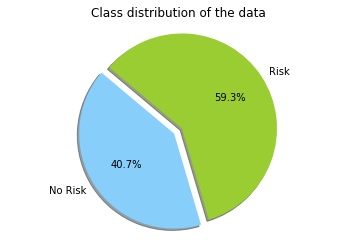

In [42]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'No Risk', 'Risk'
noRiskCount = len(combinedWithoutId[combinedWithoutId['risk'] == 0])
riskCount = len(combinedWithoutId[combinedWithoutId['risk'] == 1])
print(len(combinedWithoutId))
print(noRiskCount)
print(riskCount)

sizes = [noRiskCount, riskCount]
colors = ['lightskyblue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Class distribution of the data')
plt.axis('equal')
plt.show()


### Looks like the data is almost evenly distributed between the classes, so that is ok.

### Let us generate a heat map of the entire data. Of course, the ordering of the examples have a role to play here. We will deal with this later.

(117, 177)


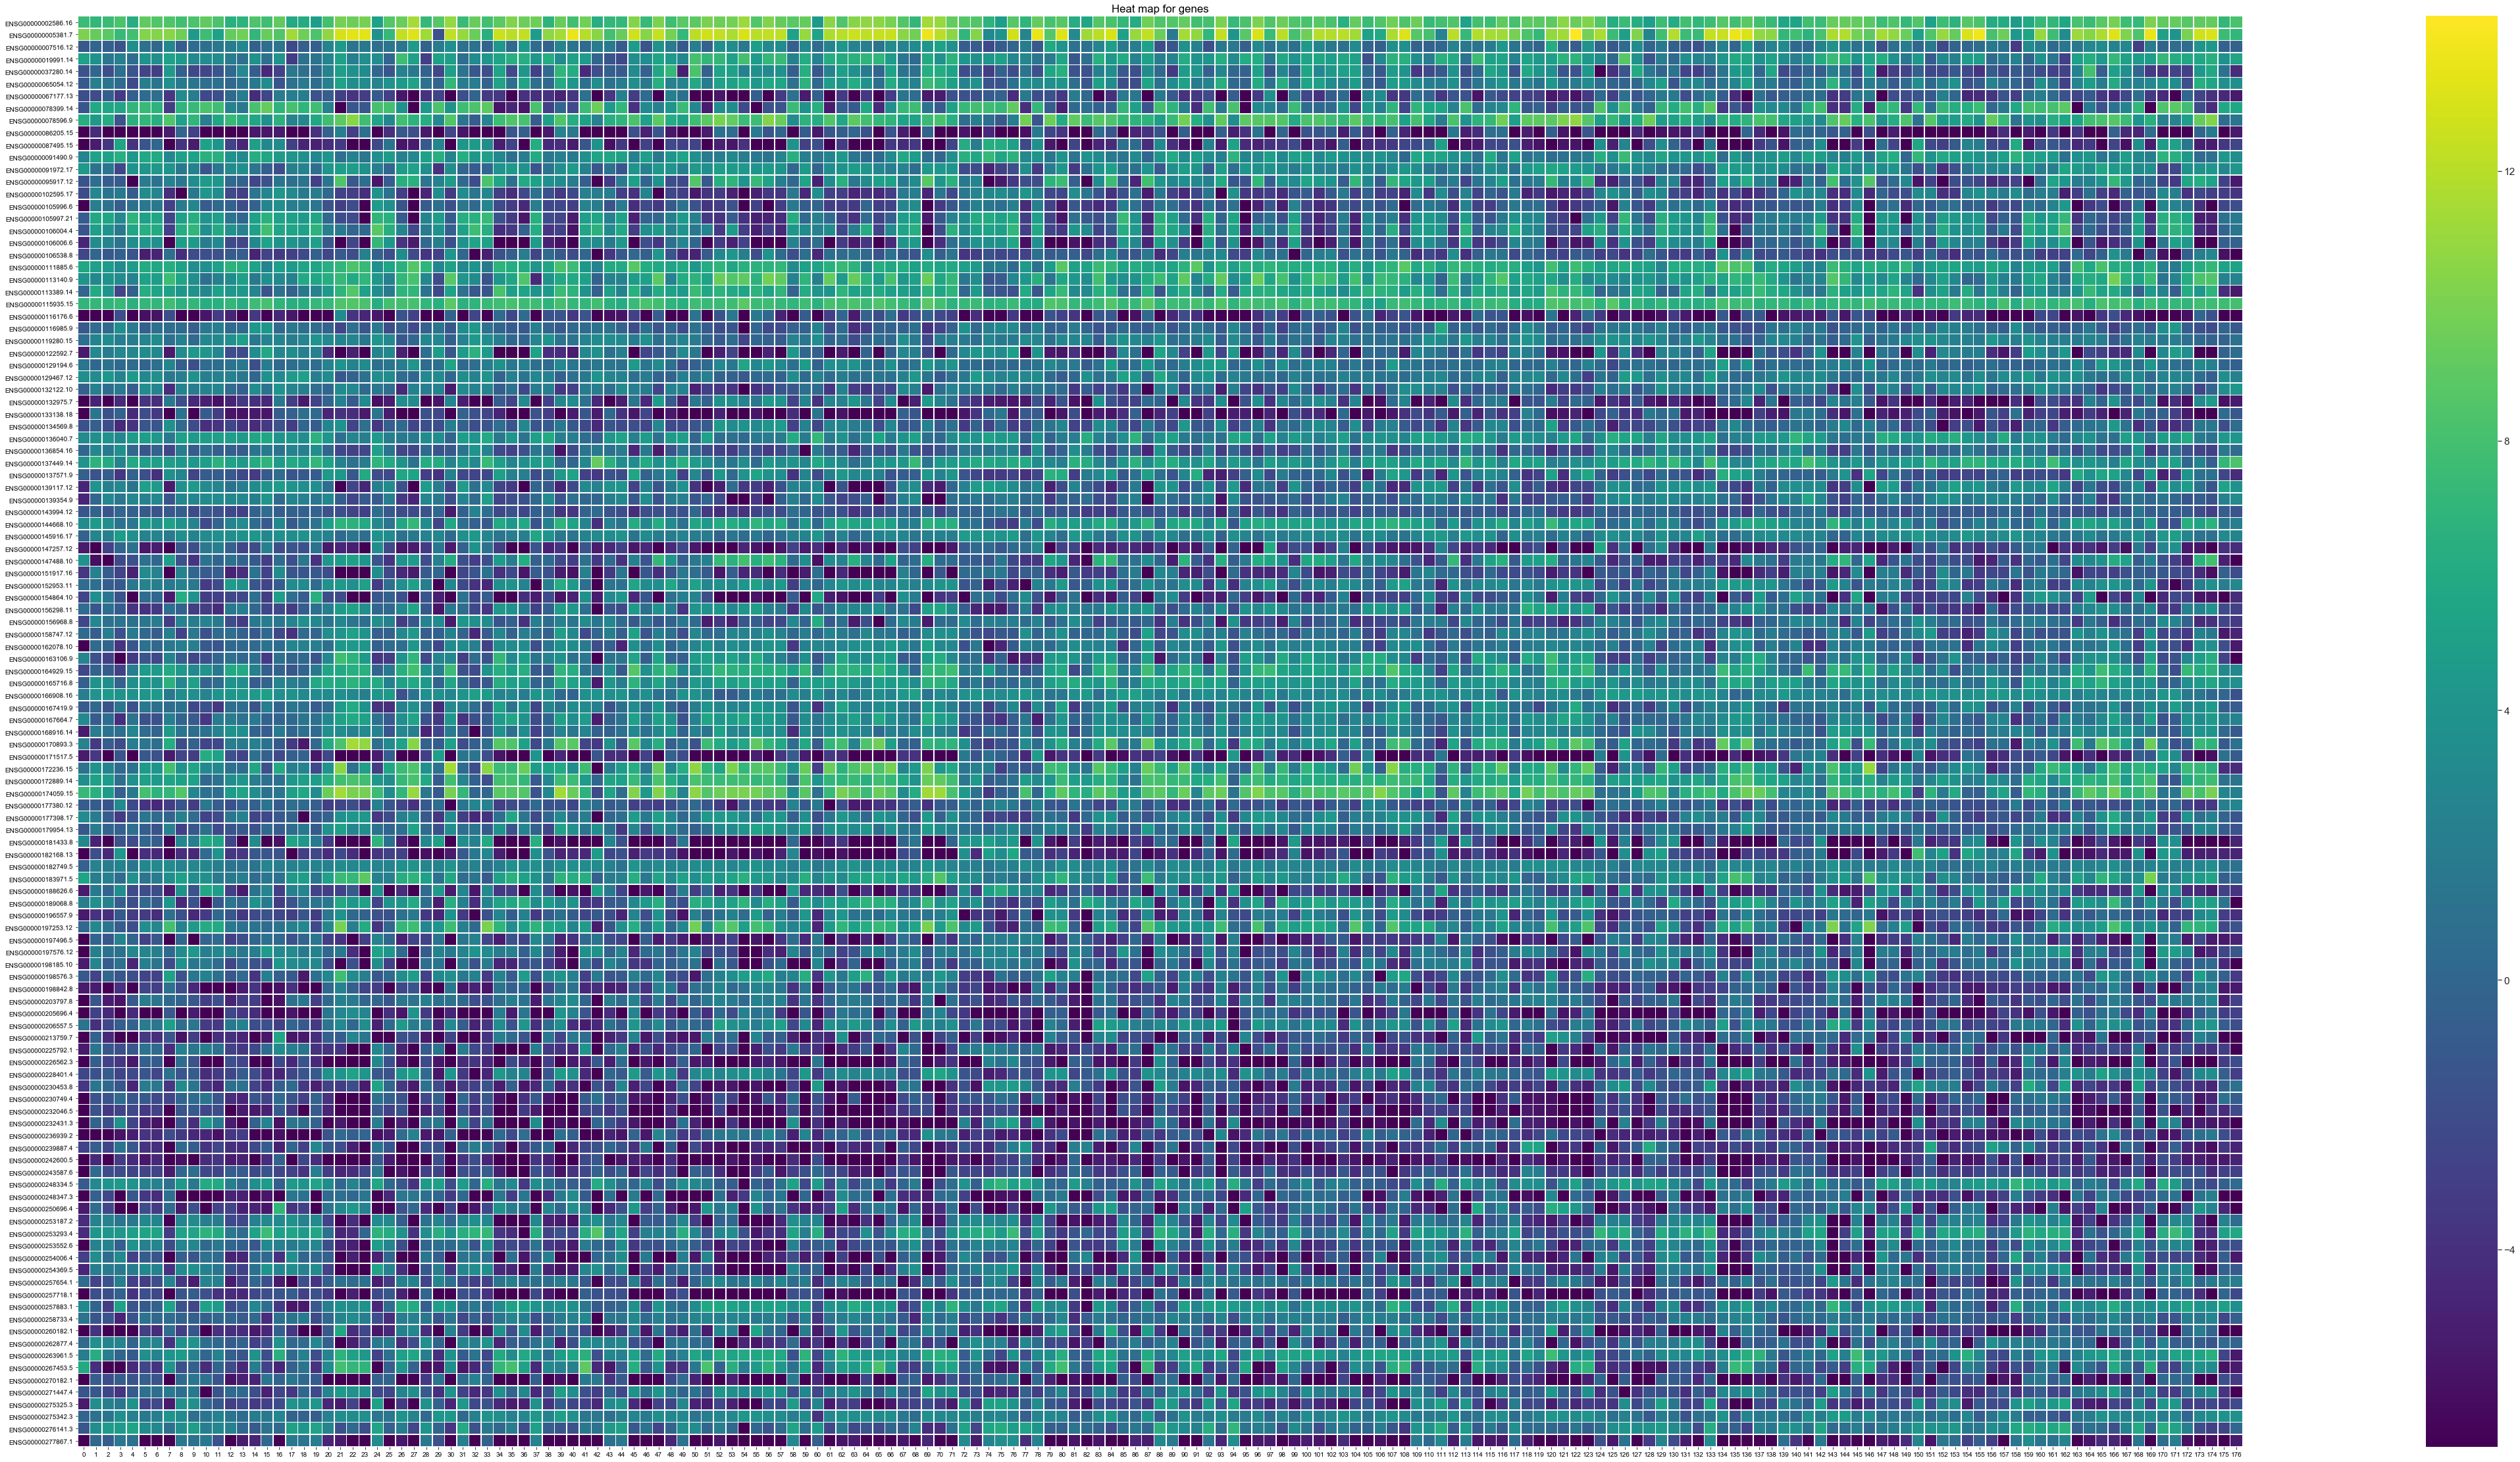

In [43]:

## We draw a 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import seaborn as sns

allColumns = X.columns.values
# Define the two groups 
#group1 = ['France', 'Italy', 'Spain', 'Portugal', 'Germany'] 
group1 =allColumns
group1
group2 = [''] * len(X_Original['entity_id'].values)
#group2 = X_Original['entity_id'].values
group2

data = X[allColumns].T.values
data
print(data.shape)
# Create a figure

a4_dims = (100,40)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.set(font_scale=1.4)
heatMap = sns.heatmap(data, fmt="g", cmap='viridis', linewidths=.5, square = True)
ax.set_yticklabels(allColumns, rotation=1)
plt.title('Heat map for genes')
plt.show()

### First let us visualize the  tree model that we trained. We trained it  for multiple folds. Let us visualize the model for the first fold.

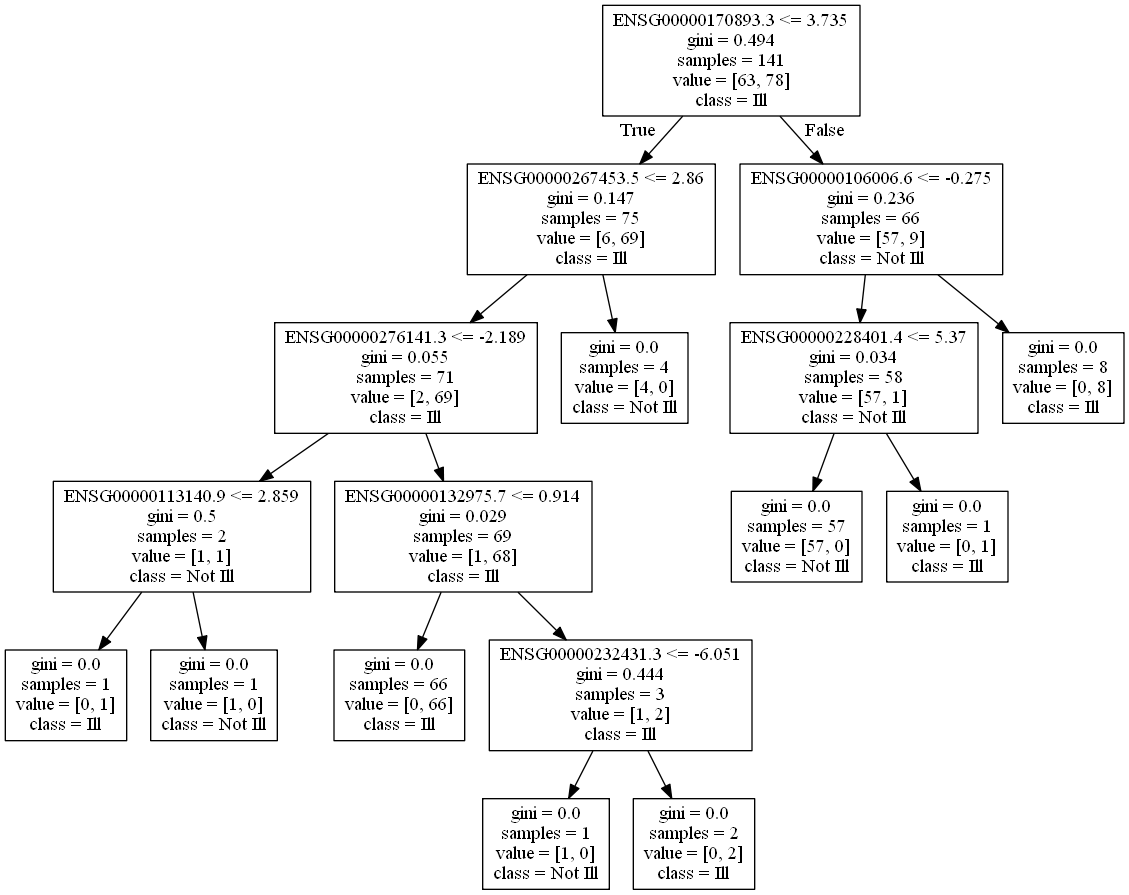

In [60]:
# Dependencies: Please make sure you have Graphviz installed on your machine. 

from sklearn import tree
import pydotplus
from IPython.display import Image

featureNames = X.columns.get_values().tolist()

# You have to indicate the class names in ascending numerical order
classNames = ['Not Ill', 'Ill']

dot_data = tree.export_graphviz(allTreeModels[0], out_file=None, feature_names=featureNames, class_names = classNames)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
image = Image(graph.create_png())


# Create PNG
graph.write_png("1k_extra_tree.png")

image

### Now let us examine the visualization for all the folds

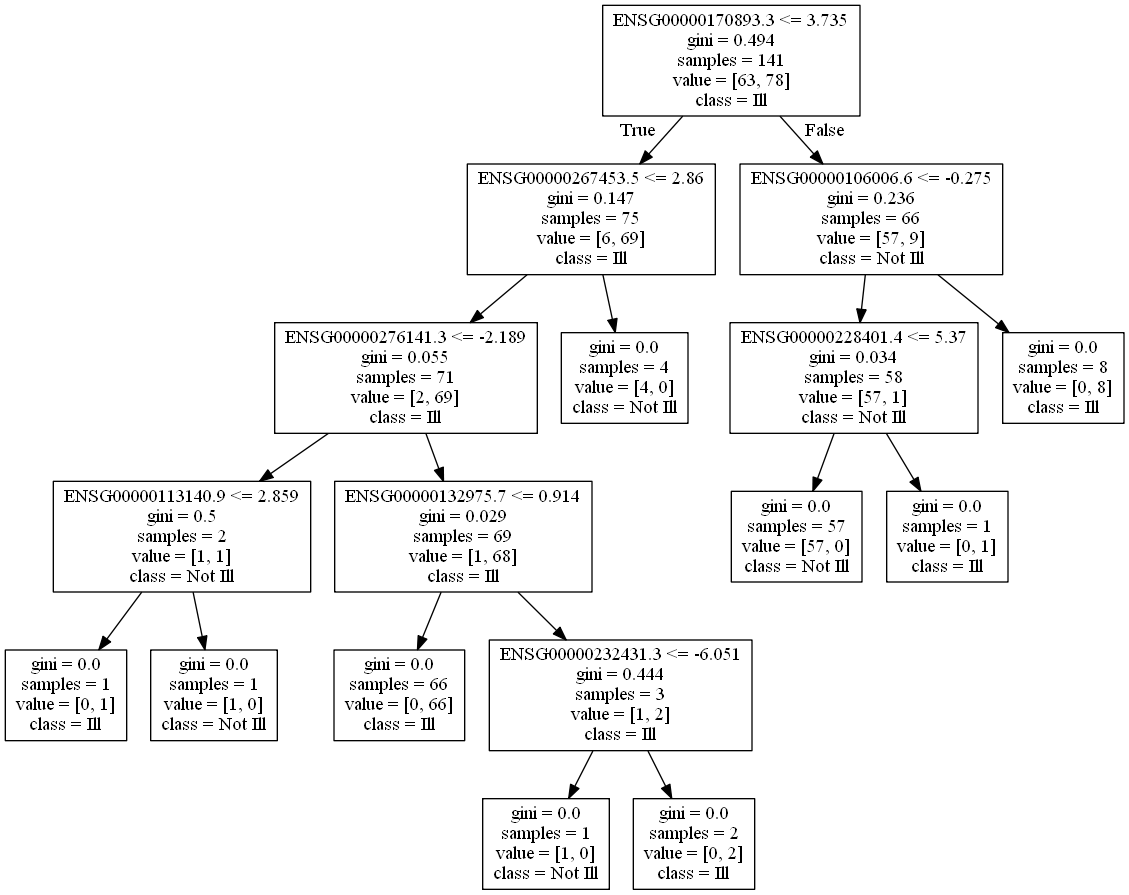

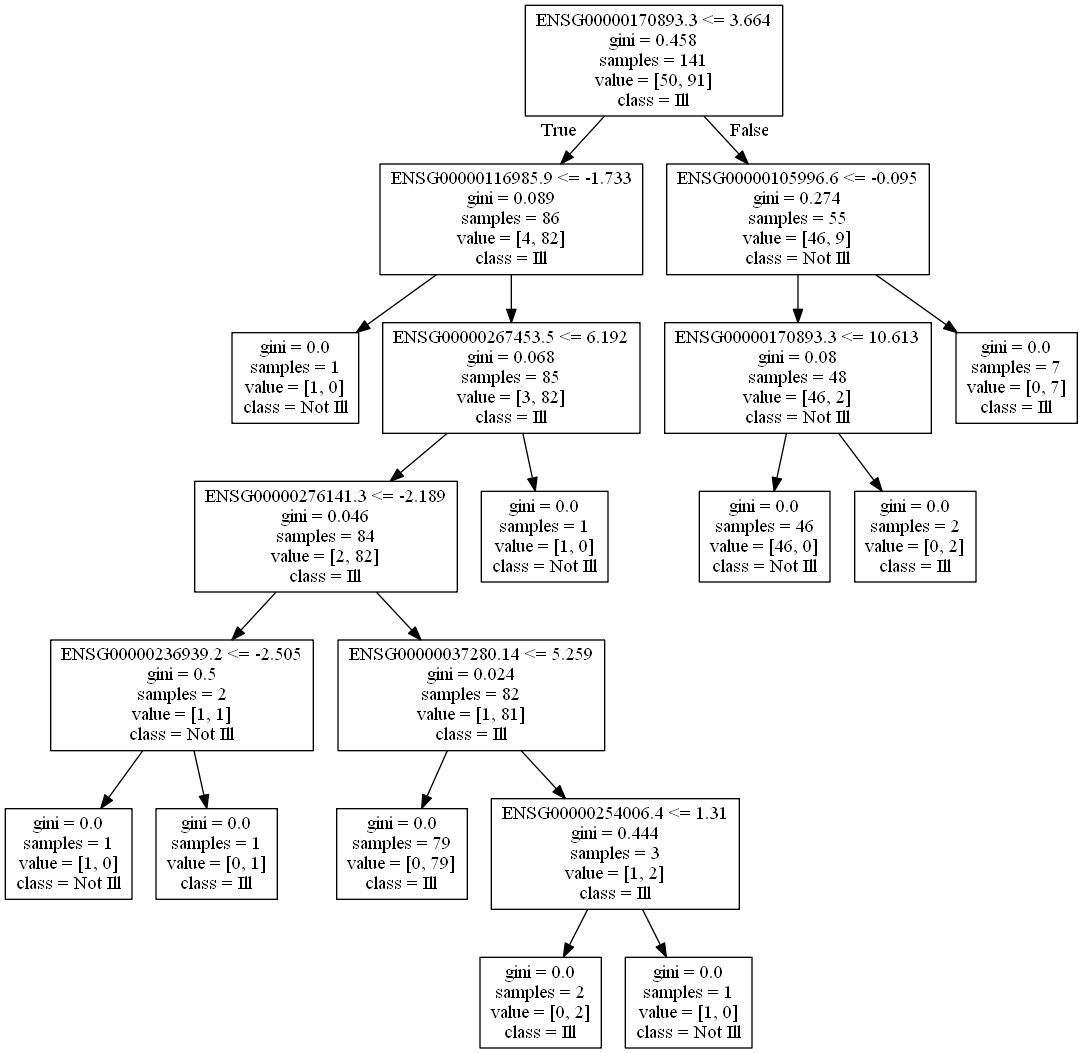

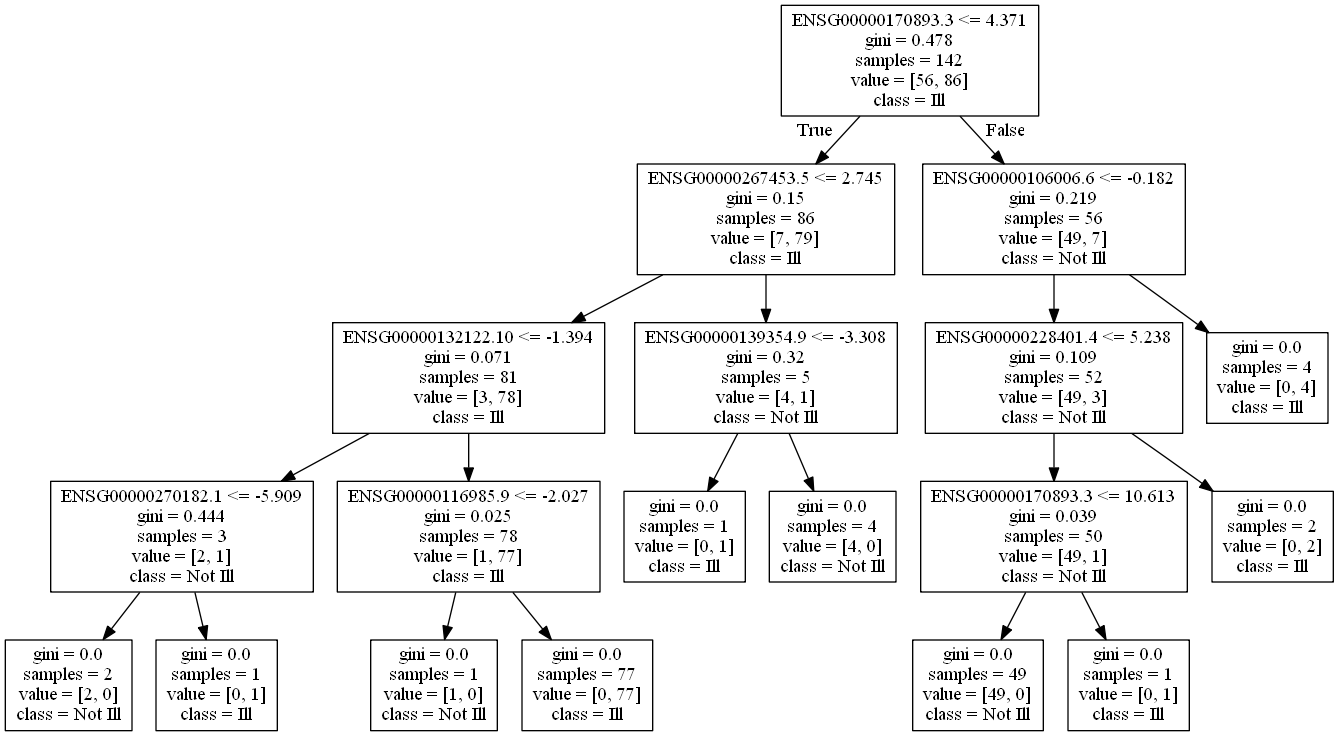

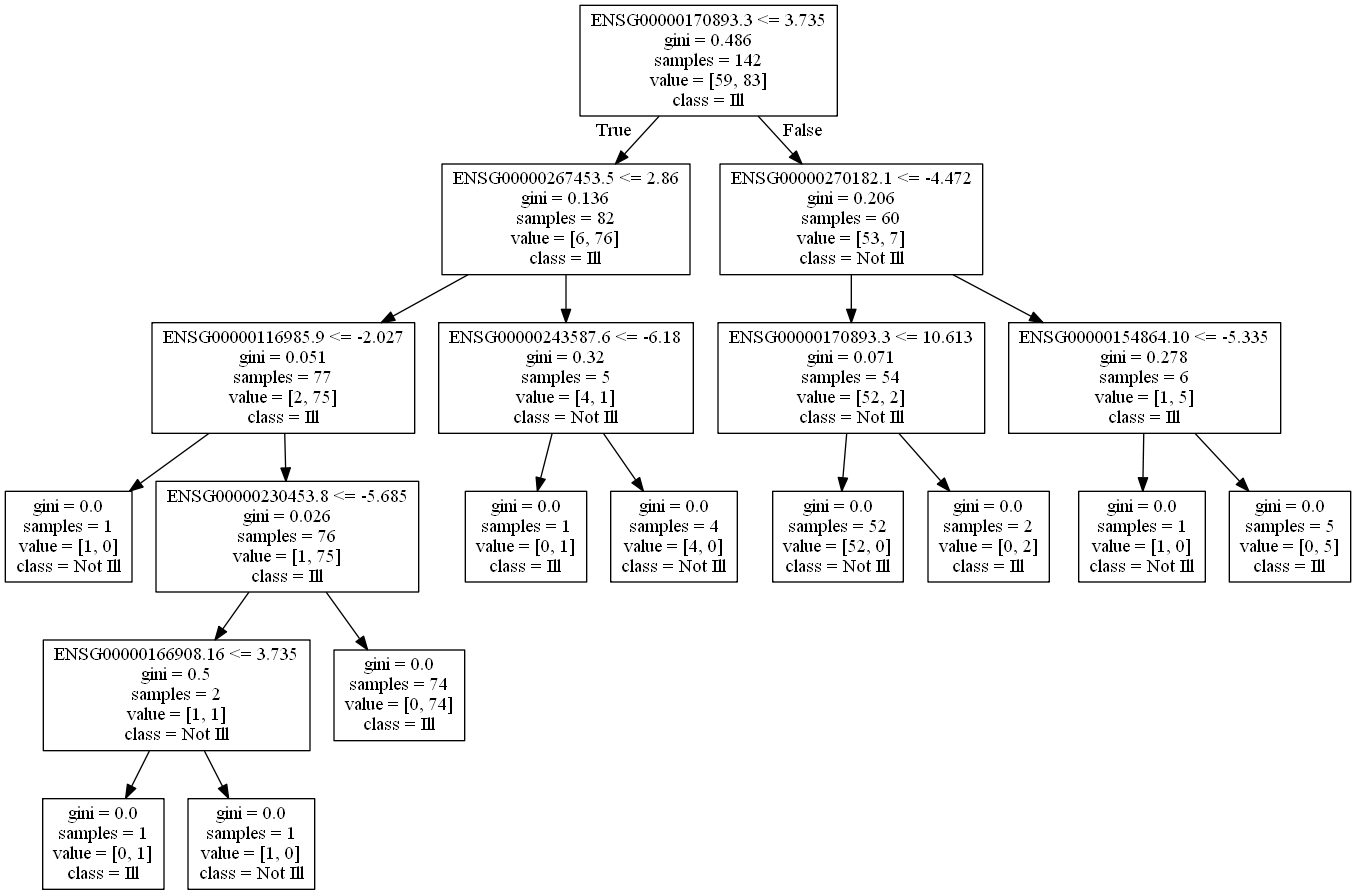

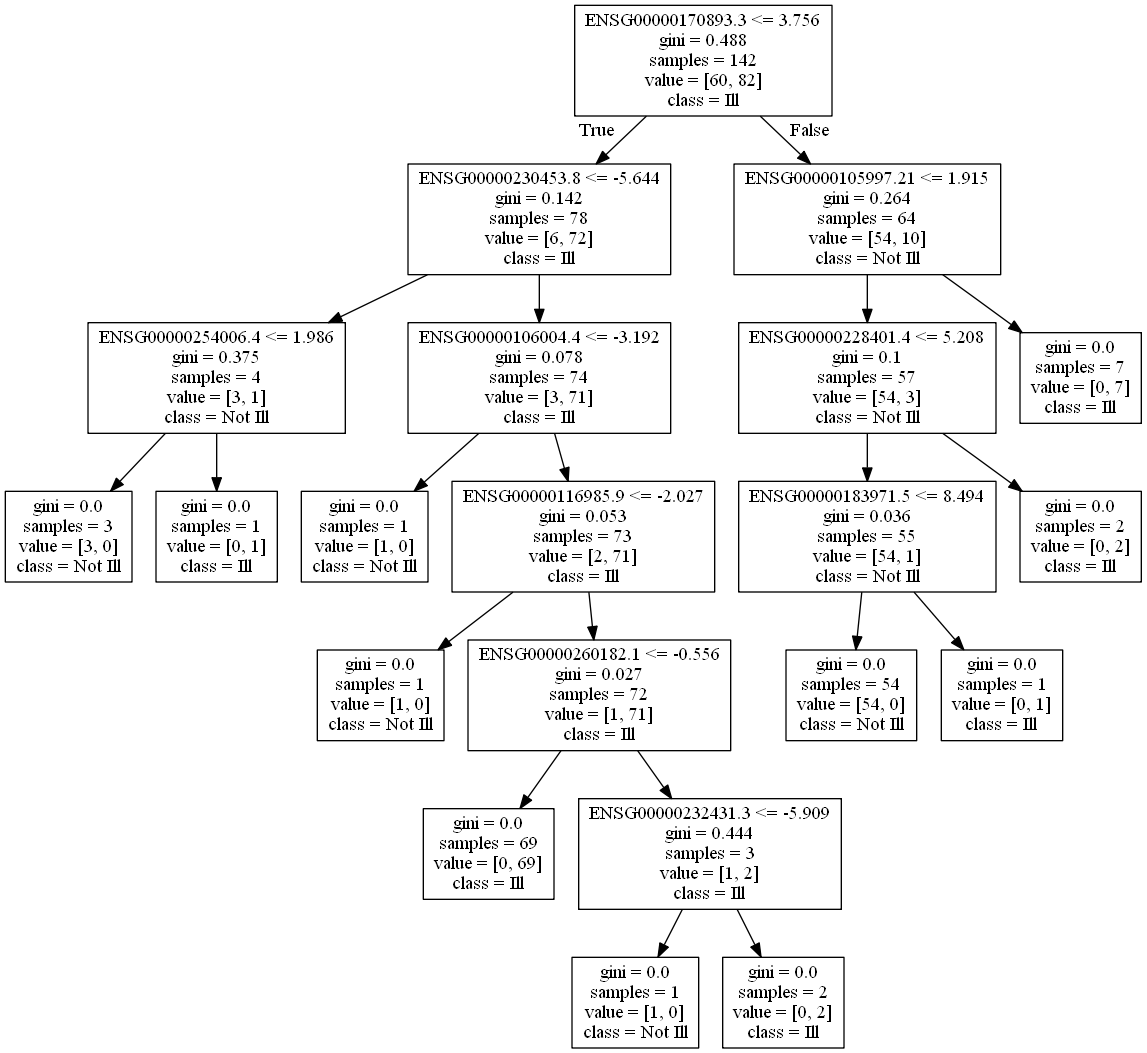

In [63]:
from sklearn import tree
import pydotplus
from IPython.display import Image
from IPython.display import display
featureNames = X.columns.get_values().tolist()

# You have to indicate the class names in ascending numerical order
classNames = ['Not Ill', 'Ill']

for i in range(5):

    dot_data = tree.export_graphviz(allTreeModels[i], out_file=None, feature_names=featureNames, class_names = classNames)

    # Draw graph
    graph = pydotplus.graph_from_dot_data(dot_data)  

    # Show graph
    image = Image(graph.create_png())

    display(image)

### Now let us look at the decision tree model we trained for the multiple folds. How did the accuracy of this tree model change over the folds?

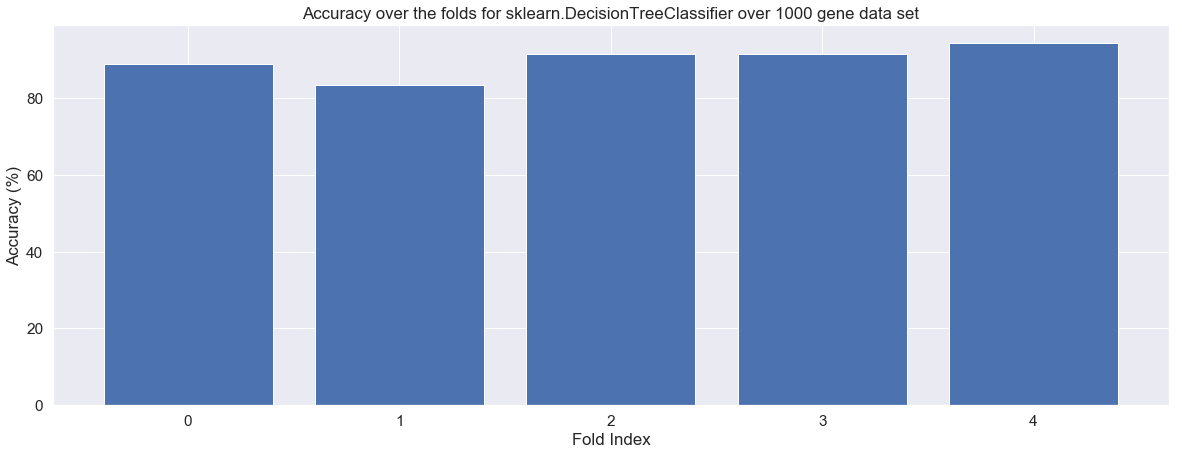

In [44]:
# Create Visualizations for the Accuracy of multiple folds for Decision Tree Classifier
# This is typically useful when for instance we have a larger number of folds, and would like to examine how the
# accuracy is changing for the classifier over the folds - whether it is steady or not.
# Display Accuracy of Decision Tree - All Folds

# Create transpose for plotting
treeAccuracyValuesFrameTranspose = treeAccuracyValuesFrame.T 
treeAccuracyValuesFrameTranspose


import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

fig = plt.figure(figsize=(20,7))

plt.bar(treeAccuracyValuesFrameTranspose.columns.values, treeAccuracyValuesFrameTranspose.iloc[0].values, align='center', alpha=1)
plt.title('Accuracy over the folds for sklearn.DecisionTreeClassifier over 1000 gene data set')
plt.ylabel('Accuracy (%)')
plt.xlabel('Fold Index')
#plt.savefig("visualizations\\{}\\{}_decision_tree_accuracy.png".format(dataSize, dataSize))

plt.show()
# Save the file
# Show graph

### Notice that the  accuracy is nearly the same over all the folds!

### Now let us look at how the importance of the genes changes over the folds. Do the same genes stay relevant across all the folds? Or do different genes become important across different folds? We draw a bar chart per fold to depict this information.

In [45]:
# Visualize the important coefficients for the first decision tree.
%matplotlib inline
import matplotlib.pyplot as pl

# Colors for every fold. 
colors = [(1, 0, 0, 1),(0, 1, 0, 1),(0, 0, 1, 1),(1, 1, 0, 1),(1, 0, 1, 1),(0, 1, 1, 1) ]

for i in range(5):

    title = "Fold {}".format(i)
    columns = decisionTreeGiniValuesFrame.columns
    replacedColumnValues = columns
    filteredDecisionTreeGini = decisionTreeGiniValuesFrame[columns]
    pl.figure(num=None, figsize=(200, 100), dpi=80, facecolor='w', edgecolor='k')
    pl.bar(replacedColumnValues, filteredDecisionTreeGini.iloc[i].values, align='center', alpha= 1, color = colors[i])
    pl.tight_layout()
    pl.title(title)
    
    
pl.xticks(rotation = 90)
pl.show()

### As we can see above, the  genes that stay relevant do not change that much. So that's good! At the very  least we can  simply take the trees per fold and when we want to perform a prediction we can get the predicted class  from the tree from each fold and then take a majority vote.

### Now let us look at the genes of the first fold. Let us see verify whether those genes are expressive or not. We do this by creating a heat map.

In [46]:
# First let us generate a heat map using the most important genes only.
# The most important genes are the ones with coefficients greater than zero.
columns = decisionTreeGiniValuesFrame.columns
# We are only looking at the first fold for the sake of analysis. Of course, if we wanted we can look at all the folds
# by running this code in a for loop. To avoid distractions, I just want to focus on one fold for now.
replacedColumnValues = [col for col in columns if decisionTreeGiniValuesFrame[col].iloc[0] > 0]
replacedColumnValues

['ENSG00000106006.6',
 'ENSG00000113140.9',
 'ENSG00000132975.7',
 'ENSG00000170893.3',
 'ENSG00000228401.4',
 'ENSG00000232431.3',
 'ENSG00000267453.5',
 'ENSG00000276141.3']

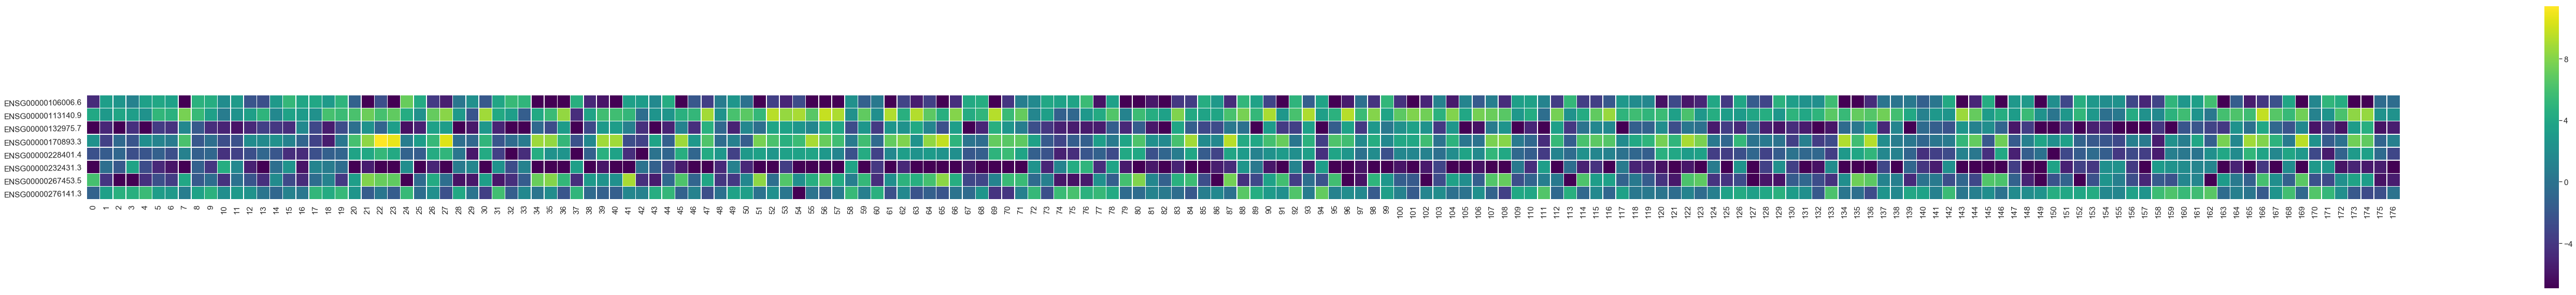

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot

# Define the two groups 
group1 = replacedColumnValues
group2 = [''] * len(X_Original['entity_id'].values)

data = X[replacedColumnValues].T.values
data

a4_dims = (100,10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.set(font_scale=1.4)
heatMap = sns.heatmap(data, fmt="g", cmap='viridis', linewidths=.5, square = True)
ax.set_yticklabels(replacedColumnValues, rotation=1)
plt.show()

### But there is a problem here. The thing is the examples are in random order. To  see whether these genes are differentially  expressed, we should put all the examples with Risk = 0 on one side and all the examples with Risk = 1 on the other side and then  look at every gene separately.

### So let us sort the data frame based on the risk property (which only has the possible values of 0 and 1)

In [48]:
combined = pd.merge(X_Original, y_Original, on='entity_id')
# Sort by risk
combined = combined.sort_values(by ='risk')
combined.head()

entity_id  ENSG00000002586.16  \
55   c7dbe2ba-c58b-52d3-a1fb-d88a614290e8            8.560086   
134  df2921ad-a4f7-5100-80b7-6efdb5493f7b            8.675687   
135  da1f507f-57d9-544f-a0f3-c439f83afa7f            7.852575   
136  bfda1874-661f-5190-b52a-a7a1f1ef8345            8.848584   
69   faa33760-970e-5597-b3a9-571c2c28af65           11.339535   

     ENSG00000005381.7  ENSG00000007516.12  ENSG00000019991.14  \
55           12.003503            4.765272            4.669654   
134          12.534452            2.289036            4.152798   
135          13.661542            0.075912            5.794848   
136          13.059196            4.861362            5.603678   
69           13.677439            4.180881            5.959482   

     ENSG00000037280.14  ENSG00000065054.12  ENSG00000067177.13  \
55             3.677377            4.304442           -0.694146   
134            1.319933            1.291459           -0.901965   
135            4.361938            2.758252           -4.367639   
136            4.496056            5.379899           -6.927145   
69             6.239128            7.500846           -5.386046   

     ENSG00000078399.14  ENSG00000078596.9  ...  ENSG00000262877.4  \
55            -6.927145           7.717934  ...          -5.724217   
134           -3.380213           6.867820  ...          -6.927145   
135           -1.149840           6.162819  ...          -6.927145   
136           -3.637532           6.780584  ...          -0.318876   
69             1.161606           7.439030  ...          -3.527863   

     ENSG00000263961.5  ENSG00000267453.5  ENSG00000270182.1  \
55            5.703589           4.564640          -6.927145   
134           3.509217           2.091792          -6.927145   
135           4.647743           7.365310          -6.927145   
136           6.466538           6.804855          -6.927145   
69            6.047019           1.268866          -5.386046   

     ENSG00000271447.4  ENSG00000275325.3  ENSG00000275342.3  \
55            3.493627          -6.927145           3.956256   
134           3.065392          -2.888187           3.792338   
135           2.660678          -6.927145          -1.433512   
136           3.715527          -6.927145           2.651660   
69            5.469320          -1.947001           3.618540   

     ENSG00000276141.3  ENSG00000277867.1  risk  
55            0.050114          -6.927145     0  
134           0.261485          -6.927145     0  
135          -0.299229          -6.927145     0  
136          -2.713254          -6.927145     0  
69           -4.176434          -4.658015     0  

[5 rows x 119 columns]

### We draw a heat map for every individual gene. The color will indicate how much of it was present in that sample.

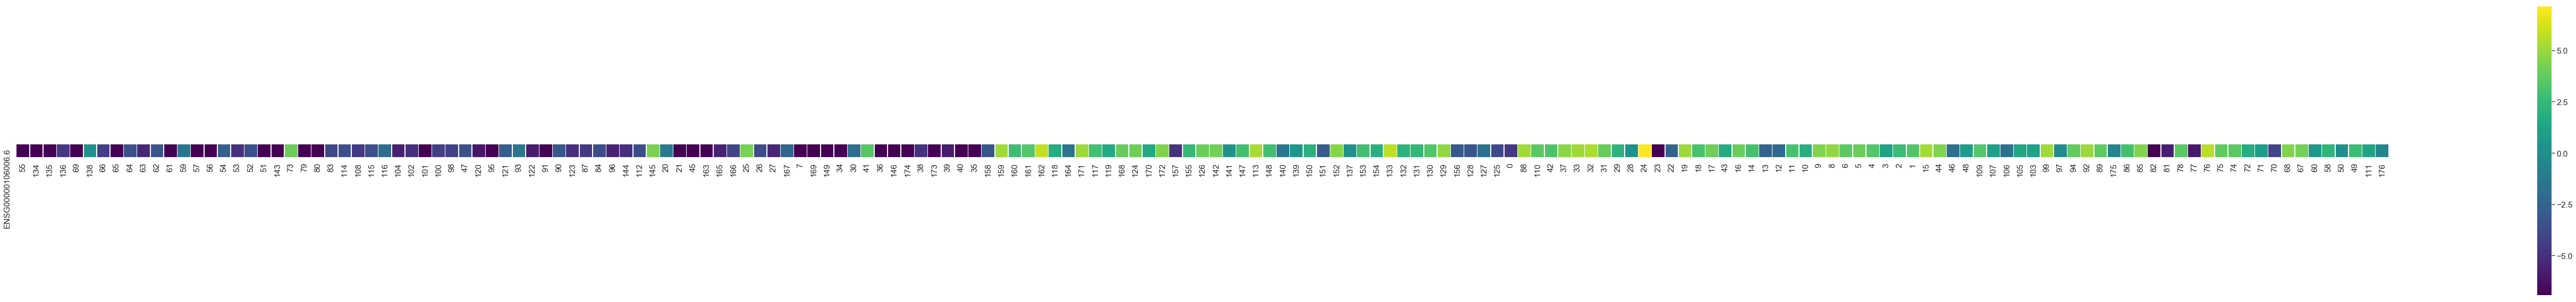

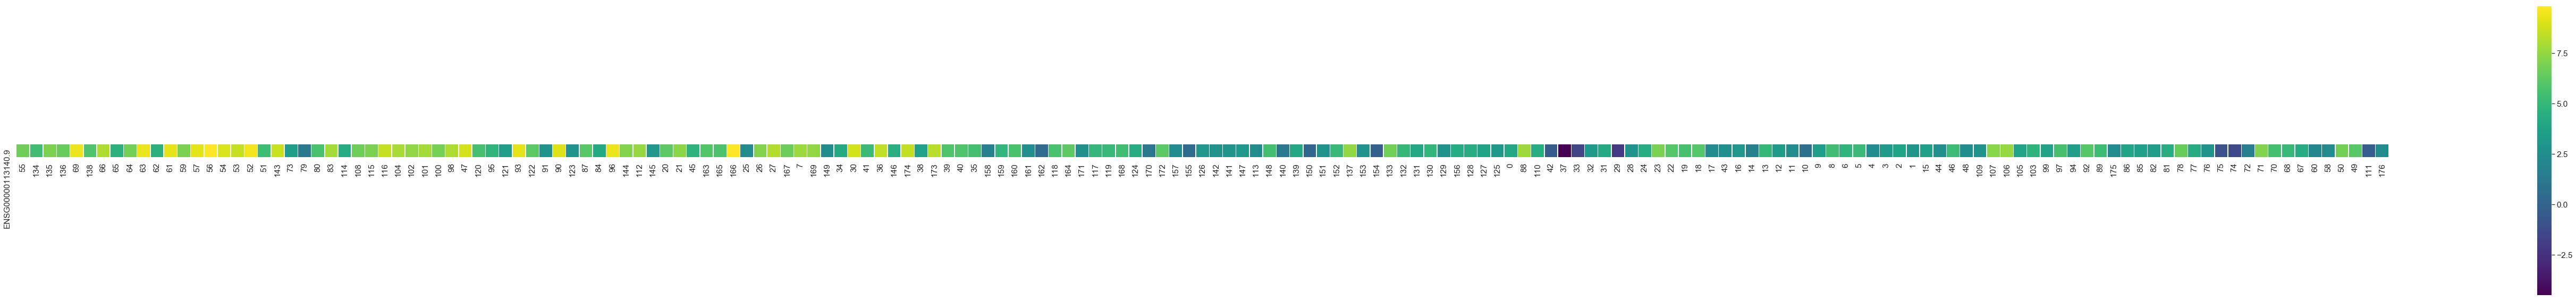

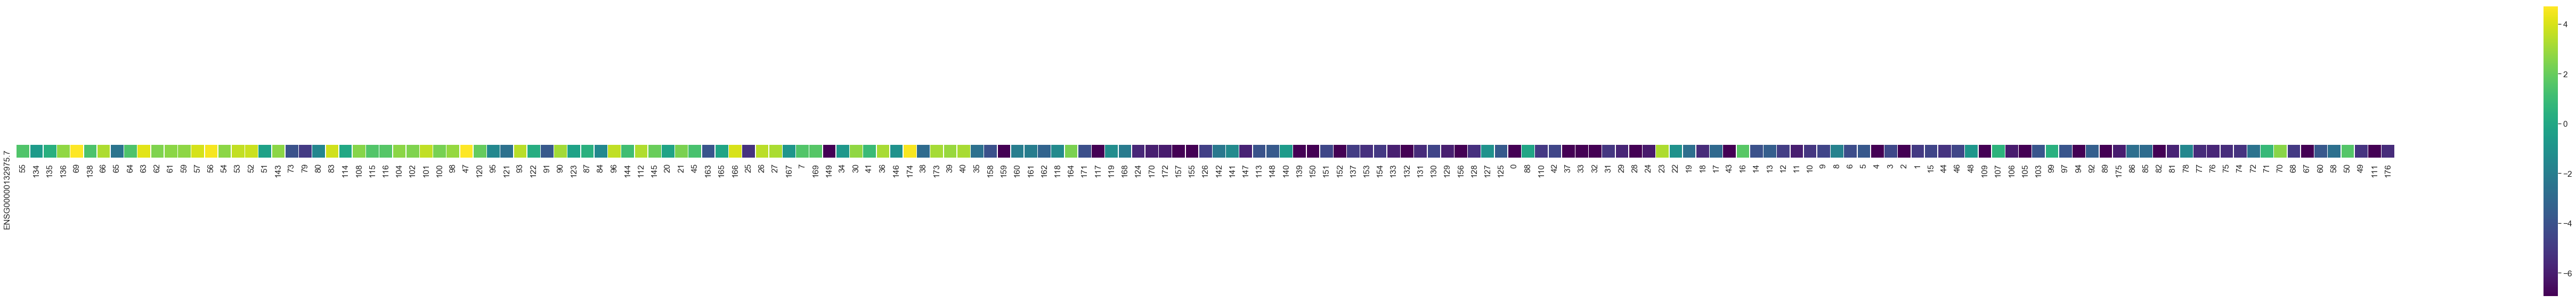

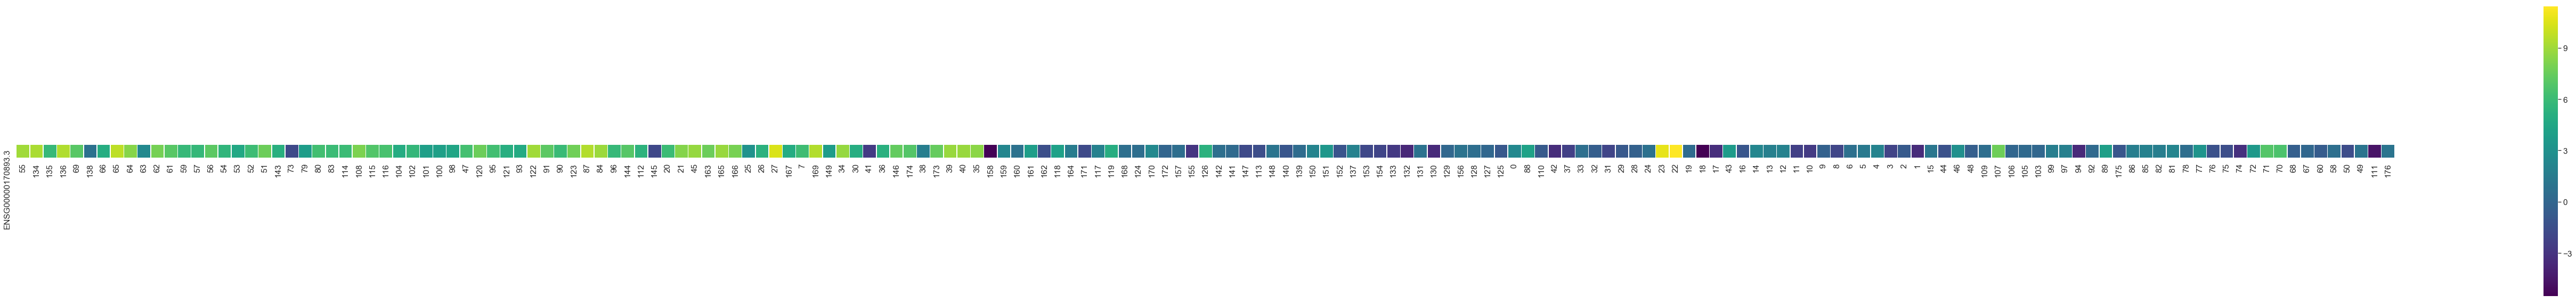

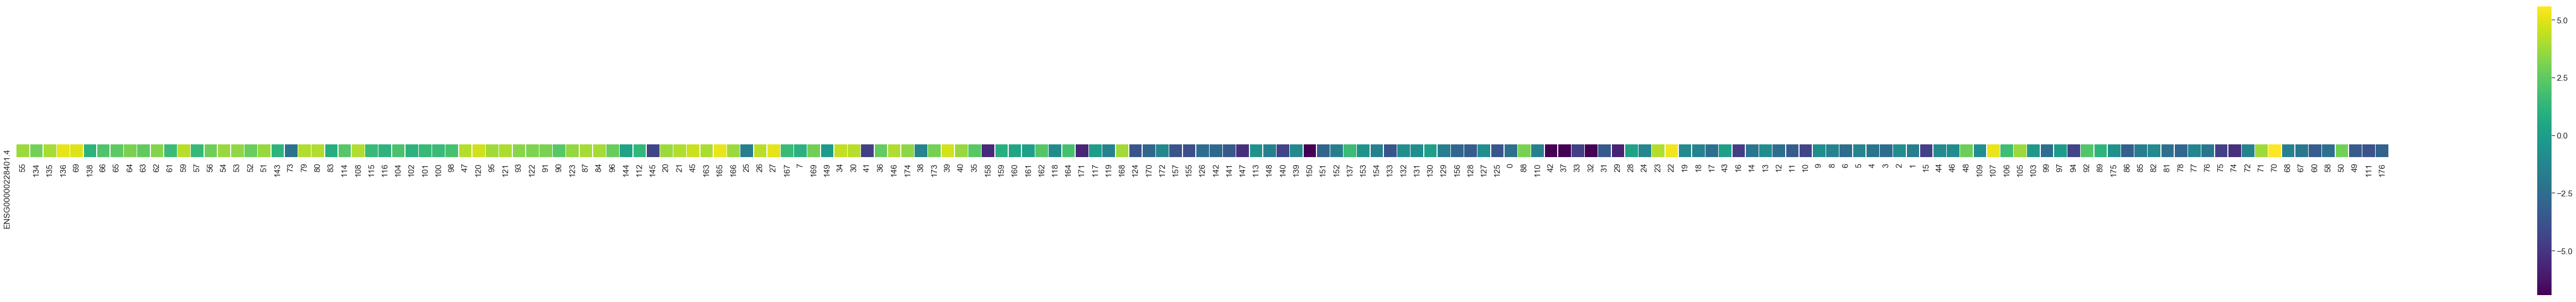

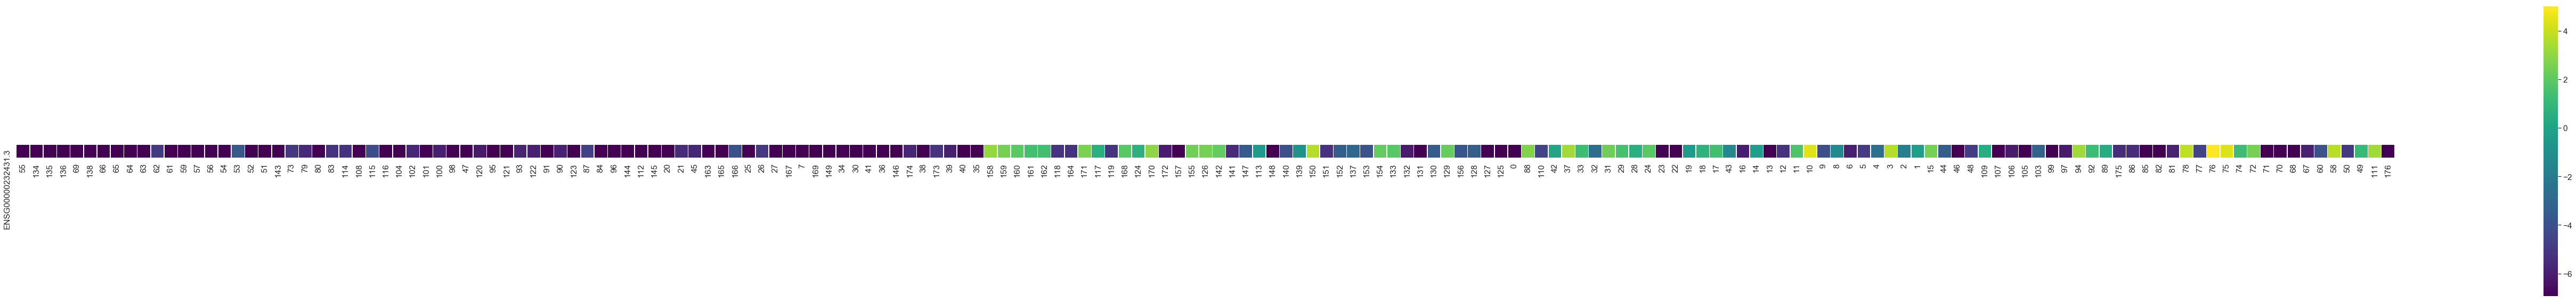

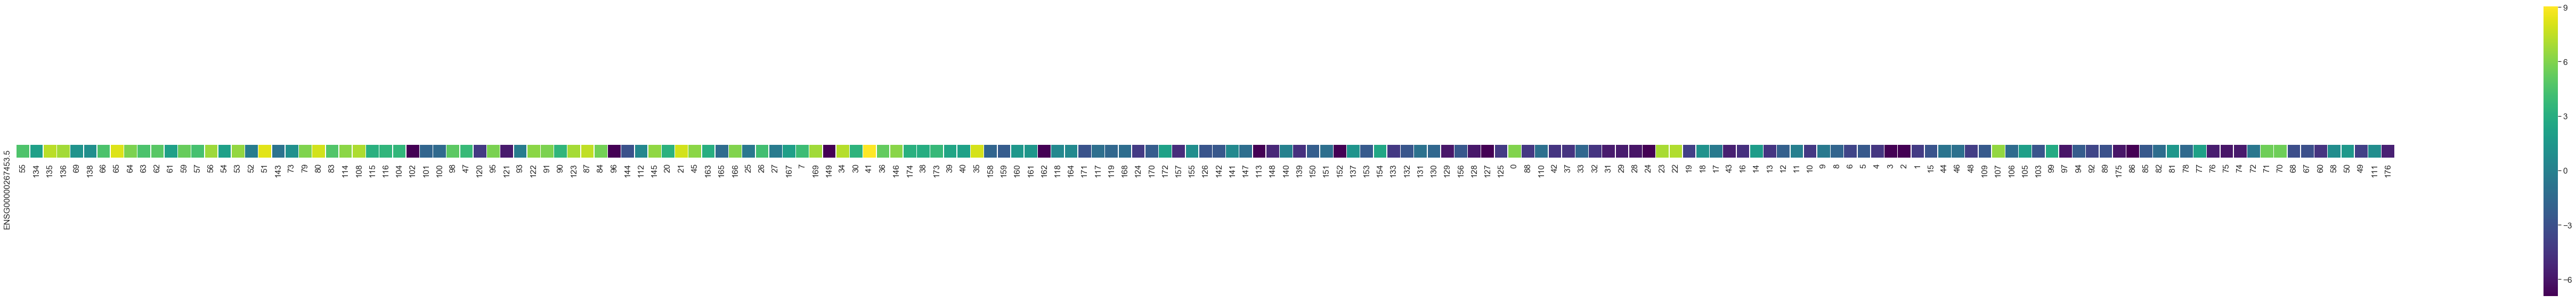

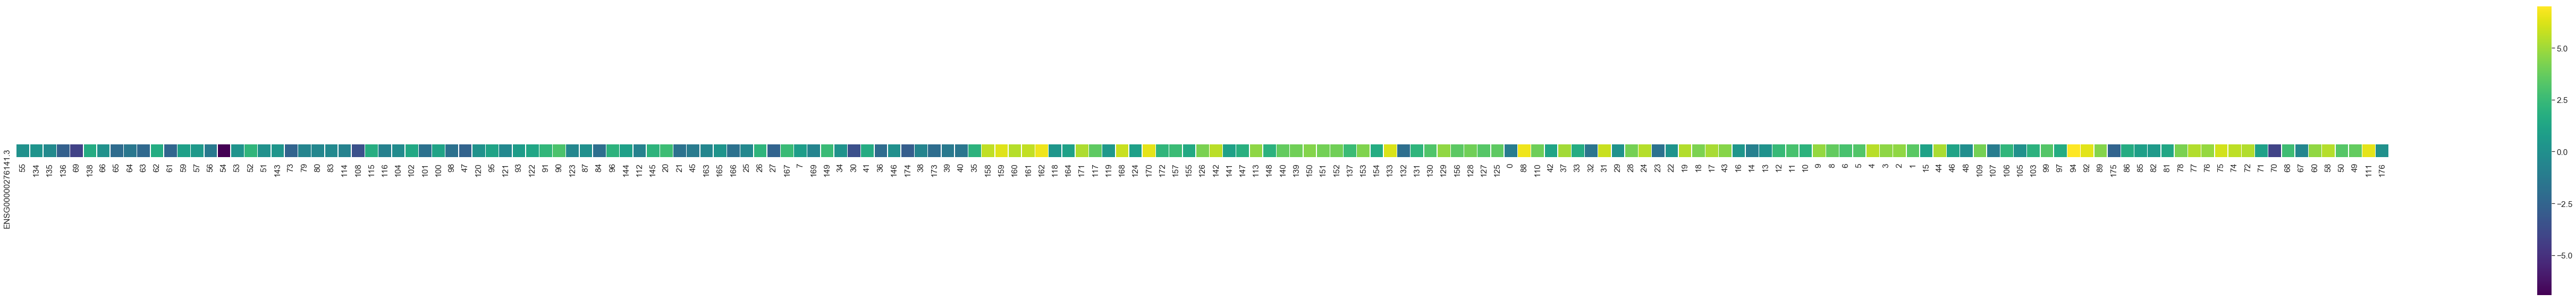

In [49]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot

for geneName in replacedColumnValues:
    data = combined[geneName]
    data = pd.DataFrame(data, columns=[geneName])
    data = data.T
    group1 = [geneName]
    group1
    group2 = [''] * len(X_Original['entity_id'].values)
    #group2 = X_Original['entity_id'].values
    group2

    a4_dims = (100,10)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    sns.set(font_scale=1.4)
    heatMap = sns.heatmap(data, fmt="g", cmap='viridis', linewidths=.5, square = True)

plt.show()

### As we can see in the heat maps above, the color separation shows whether (and how much) each gene is diffferentially expressed.